# KMeans Clustering Model

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
from sklearn.cluster import KMeans

# Perform the necessary imports
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [3]:
x = pd.read_csv('https://raw.githubusercontent.com/rivera-squared/Educacion_Machine_Learning/main/escuelas_ml.csv')

# Setting index
x = x.set_index('escuela')

# Creating copy of the dataframe to create different models
consolidadas1 = x[x['consolidada'] == 1].drop(columns = ['consolidada'])
consolidadas2 = x[x['consolidada'] == 1].drop(columns = ['consolidada'])

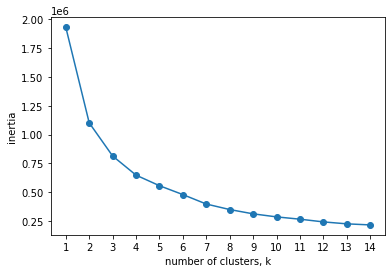

In [4]:
# Determine best number of clusters
ks = range(1, 15)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(consolidadas1)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [5]:
# Create a KMeans model with 4 clusters: model
model = KMeans(n_clusters=4)

# Use fit_predict to fit model and obtain cluster labels: labels
labels = model.fit_predict(consolidadas1)

# Adding the cluster column to be named
consolidadas1['labels'] = labels

# Grouping by cluster column and using its s
resumen = consolidadas1.groupby(['labels']).mean()

In [6]:
resumen

,matricula,promedio_espanol,promedio_matematica,promedio_ingles,promedio_ciencias
labels,,,,,
0,293.631579,42.552632,35.947368,37.421053,47.131579
1,108.544118,79.411765,82.794118,74.882353,90.176471
2,193.396552,66.379310,68.293103,59.086207,79.017241
3,140.211268,39.507042,40.549296,27.760563,41.647887


In [7]:
consolidadas1['labels'] = np.where(consolidadas1['labels'] == 1, 'alpha',
                                  np.where(consolidadas1['labels'] == 2, 'beta',
                                           np.where(consolidadas1['labels'] == 0, 'gamma',
                                                    np.where(consolidadas1['labels'] == 3, 'delta', 'other'))))

In [14]:
# Breaking down mean for each column of each group
consolidadas1.groupby(['labels']).mean()

,matricula,promedio_espanol,promedio_matematica,promedio_ingles,promedio_ciencias
labels,,,,,
alpha,108.544118,79.411765,82.794118,74.882353,90.176471
beta,193.396552,66.379310,68.293103,59.086207,79.017241
delta,140.211268,39.507042,40.549296,27.760563,41.647887
gamma,293.631579,42.552632,35.947368,37.421053,47.131579


As we can observe, there are four closed school clusters with similar features. Clusters "alpha" and "beta" are the group of closed schools that had the best average, META-PR scores for Spanish, Mathematics, English, and Science disciplines. Alpha-Beta's clusters most discernable difference is the average students enrolled.

On the other hand, clusters "gamma" and "delta" are the group of closed schools that had the worst average, META-PR scores for all disciplines. Gamma-Delta's clusters most discernable difference is the average students enrolled.

In [10]:
# First 5 schools closed on the list
consolidadas1.head(5)

,matricula,promedio_espanol,promedio_matematica,promedio_ingles,promedio_ciencias,labels
escuela,,,,,,
Clemente Ramirez de Arellano,268.0,88.0,95.0,85.0,91.0,beta
Concepcion Perez Hernandez,123.0,53.0,81.0,86.0,100.0,alpha
Cristobal Vicens,77.0,57.0,65.0,45.0,63.0,alpha
Cruz Rosa Rivas,313.0,74.0,88.0,69.0,96.0,gamma
Dolores Gomez de Roman,180.0,58.0,60.0,56.0,96.0,beta


Among all the Machine Learning methods I have used. The unsupervised K-Means clustering method can be considered the best method to attempt to understand the common features shared by schools closed in Puerto Rico in 2018.